<a href="https://colab.research.google.com/github/neerajthandayan/CourseProject/blob/main/Crime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crime Data Processing

## Importing Libraries and Datasets

In [11]:
# Importing Libraries

import pandas as pd
import numpy as np

###### Stop and Search Data 2011
###### This data has been choosen to match the ethnic population data retrieved from Cesus 2011

In [12]:
# Fetching 2011 Stop and Search Data for Analysis
# Source: https://www.gov.uk/government/statistics/tables-police-powers-and-procedures-england-and-wales-2010-to-2011

!wget 'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/115724/stops-searches-1011-tabs.xls'

--2021-04-18 02:53:32--  https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/115724/stops-searches-1011-tabs.xls
Resolving assets.publishing.service.gov.uk (assets.publishing.service.gov.uk)... 151.101.0.144, 151.101.64.144, 151.101.128.144, ...
Connecting to assets.publishing.service.gov.uk (assets.publishing.service.gov.uk)|151.101.0.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 360448 (352K) [application/vnd.ms-excel]
Saving to: ‘stops-searches-1011-tabs.xls.1’

stops-searches-1011 100%[===================>] 352.00K  --.-KB/s    in 0.02s   

2021-04-18 02:53:32 (14.1 MB/s) - ‘stops-searches-1011-tabs.xls.1’ saved [360448/360448]



In [13]:
# SS.12 - Number of persons and vehicles searched under section 1 of the Police and Criminal Evidence Act 1984

SS1 = pd.read_excel('stops-searches-1011-tabs.xls', sheet_name='SS.12', header=5)
SS1.head(5)

,Police force area,White,Black (or Black British),Asian (or Asian British),Chinese or Other,Mixed,Not \nstated,Vehicle only search,Total
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cleveland,28748.0,227.0,605.0,150.0,136.0,415.0,188.0,30469.0
2,Durham,4826.0,15.0,15.0,10.0,14.0,55.0,49.0,4984.0
3,Northumbria,42143.0,189.0,864.0,49.0,114.0,112.0,0.0,43471.0
4,North East Region,75717.0,431.0,1484.0,209.0,264.0,582.0,237.0,78924.0


In [14]:
# SS.14 - Number of persons and vehicles searched under section 60 of the Criminal Justice and Public Order Act 1994, by

SS2 = pd.read_excel('stops-searches-1011-tabs.xls', sheet_name='SS.14', header=5)
SS2.head(5)

,Police force area,White,Black (or Black British),Asian (or Asian British),Chinese or Other,Mixed,Not \nstated,Vehicle only search,Total
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cleveland,45.0,0.0,0.0,0.0,0.0,1.0,2.0,48.0
2,Durham,22.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
3,Northumbria,82.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0
4,North East Region,149.0,0.0,0.0,0.0,0.0,1.0,2.0,152.0


In [15]:
# Dropping uncessary columns
# Here, the Not stated columsn is dropped as ethinicity unclear

SS1.drop(columns=['Vehicle only search','Total','Not \nstated'], inplace=True)
SS1.dropna(inplace=True)
SS1.columns = ['Geography','SS1_White','SS1_Black','SS1_Asian','SS1_Other','SS1_Mixed']
SS1.reset_index(inplace=True, drop=True)
SS1.head(5)

,Geography,SS1_White,SS1_Black,SS1_Asian,SS1_Other,SS1_Mixed
0,Cleveland,28748.0,227.0,605.0,150.0,136.0
1,Durham,4826.0,15.0,15.0,10.0,14.0
2,Northumbria,42143.0,189.0,864.0,49.0,114.0
3,North East Region,75717.0,431.0,1484.0,209.0,264.0
4,Cheshire,5690.0,64.0,62.0,78.0,48.0


In [16]:
# Dropping uncessary columns
# Here, the Not stated columsn is dropped as ethinicity unclear

SS2.drop(columns=['Vehicle only search','Total','Not \nstated'], inplace=True)
SS2.dropna(inplace=True)
SS2.columns = ['Geography','SS2_White','SS2_Black','SS2_Asian','SS2_Other','SS2_Mixed']
SS2.reset_index(inplace=True, drop=True)
SS2.head(5)

,Geography,SS2_White,SS2_Black,SS2_Asian,SS2_Other,SS2_Mixed
0,Cleveland,45.0,0.0,0.0,0.0,0.0
1,Durham,22.0,0.0,0.0,0.0,0.0
2,Northumbria,82.0,0.0,0.0,0.0,0.0
3,North East Region,149.0,0.0,0.0,0.0,0.0
4,Cheshire,56.0,0.0,1.0,0.0,3.0


In [17]:
SS = SS1.merge(SS2, on='Geography')
sum = SS.iloc[:,6:].values + SS.iloc[:,1:6].values
stop = pd.DataFrame(sum, columns=['SS_White','SS_Black','SS_Asian','SS_Other','SS_Mixed'])
stop = pd.concat([SS['Geography'],stop], axis=1)
stop.head(5)

,Geography,SS_White,SS_Black,SS_Asian,SS_Other,SS_Mixed
0,Cleveland,28793.0,227.0,605.0,150.0,136.0
1,Durham,4848.0,15.0,15.0,10.0,14.0
2,Northumbria,42225.0,189.0,864.0,49.0,114.0
3,North East Region,75866.0,431.0,1484.0,209.0,264.0
4,Cheshire,5746.0,64.0,63.0,78.0,51.0


###### Arrest Data from 2011

In [18]:
# Fetching 2011 Arrest Data for Analysis
# Source: https://www.gov.uk/government/statistics/tables-police-powers-and-procedures-england-and-wales-2010-to-2011

!wget 'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/115722/arrests-1011-tabs.xls'

--2021-04-18 02:53:33--  https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/115722/arrests-1011-tabs.xls
Resolving assets.publishing.service.gov.uk (assets.publishing.service.gov.uk)... 151.101.0.144, 151.101.64.144, 151.101.128.144, ...
Connecting to assets.publishing.service.gov.uk (assets.publishing.service.gov.uk)|151.101.0.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 366080 (358K) [application/vnd.ms-excel]
Saving to: ‘arrests-1011-tabs.xls.1’

arrests-1011-tabs.x 100%[===================>] 357.50K  --.-KB/s    in 0.02s   

2021-04-18 02:53:33 (15.2 MB/s) - ‘arrests-1011-tabs.xls.1’ saved [366080/366080]



In [19]:
# Data load and Pre-processing

AR = pd.read_excel('arrests-1011-tabs.xls', sheet_name='A.11', header=7)
AR = pd.concat([AR.iloc[:,0],AR.iloc[:67,18:]], axis=1) 
AR = AR.iloc[:,[0,1,3,5,7,9]]
AR = AR.dropna()
AR = AR.reset_index(drop=True)
AR.columns = ['Geography','AR_White','AR_Black','AR_Asian','AR_Mixed','AR_Other']
AR = AR[['Geography','AR_White','AR_Black','AR_Asian','AR_Other','AR_Mixed']]
AR.head(5)

,Geography,AR_White,AR_Black,AR_Asian,AR_Other,AR_Mixed
0,Cleveland,21336,236,545,139,197
1,Durham,19282,84,159,70,134
2,Northumbria,46613,431,958,125,227
3,North East Region,87231,751,1662,334,558
4,Cheshire,17405,281,250,124,139


##### Merging Stop & Search, Arrests and Population Data to Creat Master Datatset

In [20]:
# Retrieving popultion data from prpject Repo

pop = pd.read_csv('https://raw.githubusercontent.com/neerajthandayan/CourseProject/main/pop_data.csv')
pop.drop(columns='Unnamed: 0', inplace=True)
pop.head(5)

,Geography,White,Black,Asian,Other,Mixed
0,Avon and Somerset,1491970,30923,33005,15380,28277
1,Bedfordshire,476647,29725,81480,8753,18456
2,Cambridgeshire,726531,10174,39535,12572,16029
3,Cheshire,995998,3264,12794,5230,10423
4,Cleveland,526456,3156,17419,4434,5762


In [21]:
# Merging dataset

master = pop.merge(stop.merge(AR, on='Geography'), on='Geography')
master

,Geography,White,Black,Asian,Other,Mixed,SS_White,SS_Black,SS_Asian,SS_Other,SS_Mixed,AR_White,AR_Black,AR_Asian,AR_Other,AR_Mixed
0,Avon and Somerset,1491970,30923,33005,15380,28277,13190.0,1010.0,252.0,34.0,454.0,32156,1985,702,204,1034
1,Bedfordshire,476647,29725,81480,8753,18456,5853.0,1057.0,1483.0,56.0,407.0,10414,1550,1943,172,811
2,Cambridgeshire,726531,10174,39535,12572,16029,11382.0,453.0,898.0,75.0,337.0,16486,809,899,139,595
3,Cheshire,995998,3264,12794,5230,10423,5746.0,64.0,63.0,78.0,51.0,17405,281,250,124,139
4,Cleveland,526456,3156,17419,4434,5762,28793.0,227.0,605.0,150.0,136.0,21336,236,545,139,197
5,Cumbria,492257,579,2913,1605,2504,9652.0,29.0,54.0,11.0,31.0,10243,36,52,24,30
6,Derbyshire,949845,10090,36871,7281,14351,10157.0,290.0,578.0,26.0,285.0,18656,652,1020,208,559
7,Devon and Cornwall,1627306,4106,11694,9467,15645,19016.0,164.0,82.0,32.0,166.0,26486,344,231,110,288
8,Dorset,714637,3208,10694,5995,9507,6238.0,294.0,78.0,20.0,98.0,12475,387,158,93,241
9,Durham,605364,1058,5114,3030,4240,4848.0,15.0,15.0,10.0,14.0,19282,84,159,70,134


#### Crime Data Visualisation

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


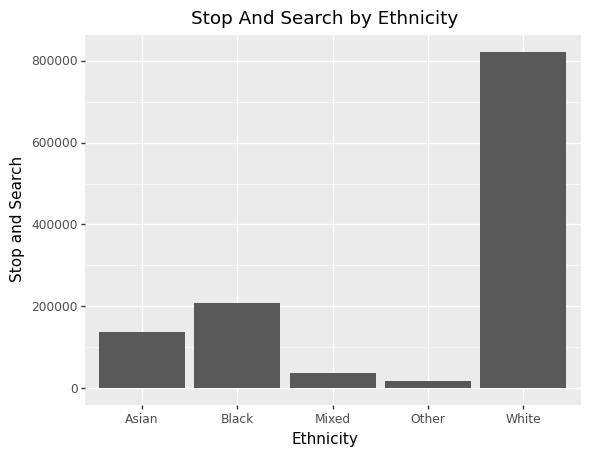

<ggplot: (8789921069665)>

In [68]:
from plotnine import *

y = stop.tail(1).iloc[:,1:].values
x = ['White', 'Black', 'Asian', 'Other', 'Mixed']

ggplot(df1, aes(x=x, y=y)) + \
geom_bar(stat = 'identity') + \
xlab('Ethnicity') + \
ylab('Stop and Search') + \
ggtitle('Stop And Search by Ethnicity')

#### Plotting Proportioned Stop and Search Data

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


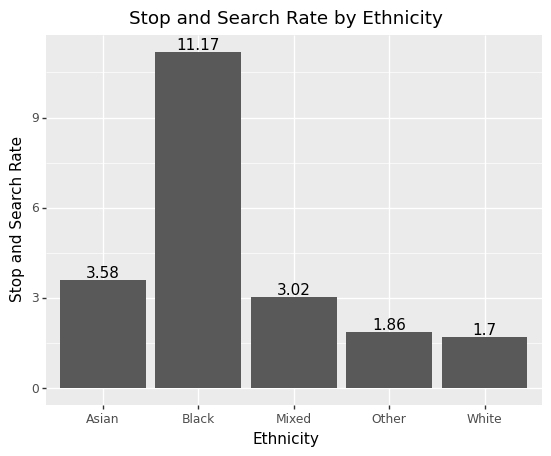

<ggplot: (8789921123341)>

In [101]:
y1 = (y/pop.iloc[:,1:].values.sum(axis=0)) * 100

ggplot(df1, aes(x=x, y=y1)) + \
geom_bar(stat = 'identity') + \
xlab('Ethnicity') + \
ylab('Stop and Search Rate') + \
ggtitle('Stop and Search Rate by Ethnicity') + \
geom_text(aes(label=np.round(y1,2)), vjust='bottom')